In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv(r"C:\Users\talld\PycharmProjects\FraudDetection\Code\creditcard.csv")

# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Apply Random Under-Sampling to balance classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Scale the "Amount" column
scaler = StandardScaler()
X_resampled['Amount'] = scaler.fit_transform(X_resampled['Amount'].values.reshape(-1, 1))

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=2, min_samples_split=10, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba = rf.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.5).astype(int)

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

ROC AUC: 0.975314368171511
Precision: 0.9560439560439561
Recall: 0.8877551020408163
F1-Score: 0.9206349206349207


In [6]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.456932
1686,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,0.464675,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,-0.259325
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,0.620884
128360,78685.0,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.161347,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,-0.451067
20746,31244.0,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.223027,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,-0.373197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89723,62698.0,1.100963,0.016821,1.069516,1.501387,-0.639284,0.088885,-0.316986,0.093640,0.772528,...,-0.150015,-0.052344,0.272351,-0.043941,0.462689,0.608604,-0.297268,0.081065,0.027803,-0.420524
200118,133292.0,1.895817,-0.111575,-1.787544,0.339969,0.243479,-0.722965,0.084754,-0.118046,0.756819,...,-0.058060,-0.186852,-0.402004,0.092918,-0.517157,-0.079183,-0.088277,-0.014406,-0.023207,-0.190117
6641,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.483303,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,-0.452421
33631,37314.0,1.438450,-1.108186,0.765152,-1.183354,-2.056695,-1.345164,-1.044208,-0.147907,-1.590913,...,-0.429631,-0.430673,-1.031936,0.286433,0.798955,-0.021241,-0.508494,0.021043,0.032515,-0.321585


ROC AUC: 0.9236755308183879
Precision: 0.9560439560439561
Recall: 0.8877551020408163
F1-Score: 0.9206349206349207


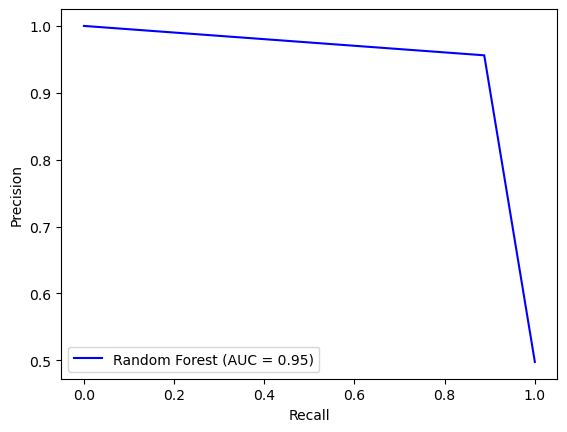

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)

plt.plot(recall, precision, color='b', label='Random Forest (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Load your dataset
data = pd.read_csv(r"C:\Users\talld\PycharmProjects\FraudDetection\Code\creditcard.csv")

# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Apply Random Under-Sampling to balance classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Scale the "Amount" column
scaler = StandardScaler()
X_resampled['Amount'] = scaler.fit_transform(X_resampled['Amount'].values.reshape(-1, 1))

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Predict probabilities on the test set using the best model
y_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.5).astype(int)

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
ROC AUC: 0.975314368171511
Precision: 0.9560439560439561
Recall: 0.8877551020408163
F1-Score: 0.9206349206349207


In [1]:
print(X_test[0])

NameError: name 'X_test' is not defined